# Sampler Example

Samplers are used to split the dataset into small parts. This is useful when files are too large to fit into memory. In this example, we will use the `RowSampler` to split the dataset into small parts in row-wise order.

In [16]:
import rasterio
from pathlib import Path
import faninsar as fis
import numpy as np
from faninsar import datasets, query, samplers
from rasterio import plot

In [17]:
home_dir = Path("/Volumes/Data/GeoData/YNG/Sentinel1/Hyp3/descending_roi/across_year")
files = list(home_dir.rglob("*.tif"))

In [18]:
roi = query.BoundingBox(98.86577623, 38.78569282, 98.91011003, 38.83976813, crs=4326)

ds = datasets.RasterDataset(paths=files[:3])
# get the profile of the dataset
profile = ds.get_profile(roi)

Init the sampler with the dataset, roi, and batch size. Then you can iterate over the sampler to get the BoundingBoxes, which are the subset of the dataset.

In [22]:
sampler = samplers.RowSampler(ds, roi, 10)

Following is a simple example of how to use the sampler to get the bounding boxes of the dataset.

Loading  Files: 100%|██████████| 3/3 [00:00<00:00, 519.65 files/s]


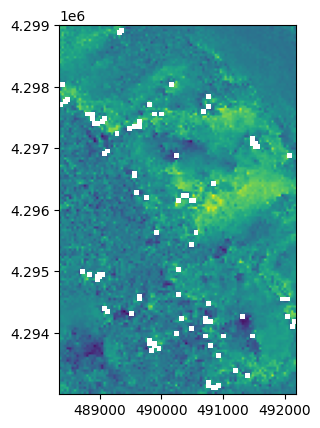

In [20]:
new_tile = "/Volumes/Data/GeoData/YNG/temp/test.tif"
with rasterio.open(new_tile, "w+", **profile) as dst:
    for bbox in sampler:
        smp = ds[bbox]
        arr = smp.boxes.data.squeeze(0)
        win = dst.window(*bbox)
        dst.write(arr, window=win)
        
with rasterio.open(new_tile) as src:
    plot.show(src)

Following code shows the case that only first 7 bounding boxes are written into file. 

Loading  Files: 100%|██████████| 3/3 [00:00<00:00, 1077.58 files/s]


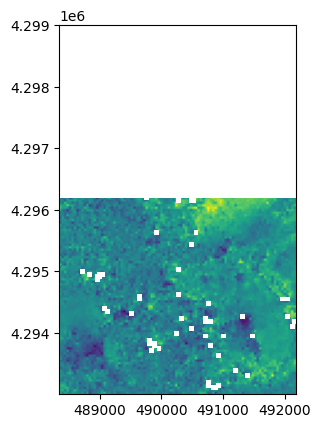

In [21]:
with rasterio.open(new_tile, "w+", **profile) as dst:
    for i, bbox in enumerate(sampler):
        smp = ds[bbox]
        arr = smp.boxes.data.squeeze(0)
        win = dst.window(*bbox)
        dst.write(arr, window=win)
        if i > 6:
            break

with rasterio.open(new_tile) as src:
    plot.show(src)